## Sentiment Analysis using Support Vector Machine

### Import necessary libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time

### Load the data

In [33]:
df = pd.read_csv("hf://datasets/AhmedSSoliman/sentiment-analysis-for-mental-health-Combined-Data/sentiment-analysis-for-mental-health-Combined Data.csv")
df.columns.values[0] = "id"
df = df.dropna(subset=["statement"])

### Preprocess the status

In [34]:
le = LabelEncoder()
df['labeled_status'] = le.fit_transform(df['status'])
print(df.head())

   id                                          statement   status  \
0   0                                         oh my gosh  Anxiety   
1   1  trouble sleeping, confused mind, restless hear...  Anxiety   
2   2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3   3  I've shifted my focus to something else but I'...  Anxiety   
4   4  I'm restless and restless, it's been a month n...  Anxiety   

   labeled_status  
0               0  
1               0  
2               0  
3               0  
4               0  


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['labeled_status'], test_size=0.2, random_state=42, stratify=df['labeled_status'])
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Implement the linear SVM

In [38]:
start = time.time()
svm_model = SVC(kernel='linear', C=1.0)  
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)
end = time.time()
elapsed_time = end - start

In [40]:
elapsed_time/60

4.826568881670634

### Print classification report

In [47]:
label_names = ['Normal', 'Anxiety', 'Depression', 'Suicidal', 'Stress', 'Bipolar', 'Personality disorder']

report = classification_report(y_test, y_pred, target_names=label_names)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", report)

Accuracy: 0.7699534972003417
Classification Report:
                       precision    recall  f1-score   support

              Normal       0.80      0.77      0.79       768
             Anxiety       0.88      0.71      0.78       556
          Depression       0.69      0.75      0.72      3081
            Suicidal       0.87      0.94      0.90      3269
              Stress       0.86      0.52      0.65       215
             Bipolar       0.70      0.46      0.55       517
Personality disorder       0.70      0.66      0.68      2131

            accuracy                           0.77     10537
           macro avg       0.79      0.69      0.72     10537
        weighted avg       0.77      0.77      0.77     10537



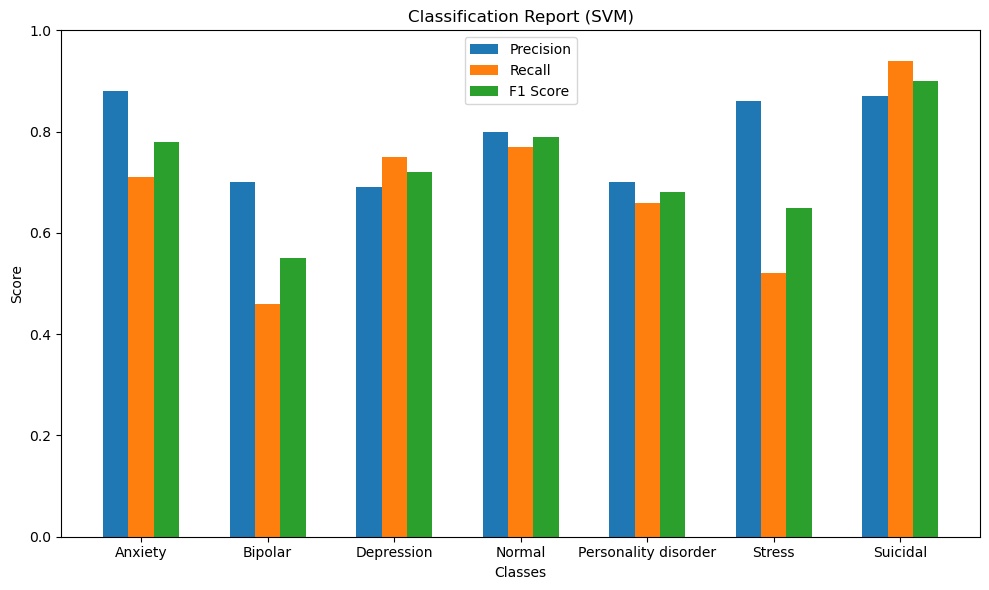

In [48]:
classes = ['Anxiety', 'Bipolar', 'Depression', 'Normal', 'Personality disorder', 'Stress', 'Suicidal']
precision = [0.88, 0.70, 0.69, 0.80, 0.70, 0.86, 0.87]
recall    = [0.71, 0.46, 0.75, 0.77, 0.66, 0.52, 0.94]
f1_score  = [0.78, 0.55, 0.72, 0.79, 0.68, 0.65, 0.90]

x = np.arange(len(classes))  
width = 0.2  

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1 Score')


plt.ylabel('Score')
plt.xlabel('Classes')
plt.title('Classification Report (SVM)')
plt.xticks(x, classes)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()